# Inputting CSV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Exploratory Data Analysis with Some Data Preprocessing

## Check null value of each column

In [4]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## check unique value of string type column

In [5]:
df.state.unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [6]:
df.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

## Replacing yes and no to 1 and 0, so the data could be easily analyzed

In [7]:
df2 = df.replace('yes',1)
df2 = df2.replace('no',0)

In [8]:
df2.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

## Getting insight of mean, std, quantile, min and max value of every column

In [9]:
df2.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Remove duplicates, but turns out there are no duplicated values

In [10]:
dups = df2.duplicated()
dups.sum()

0

## Checking normal distribution of minute call

In [11]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm

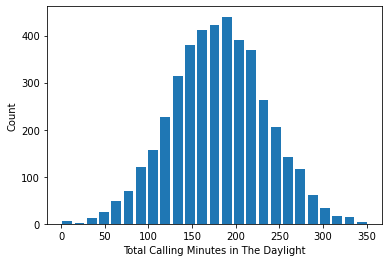

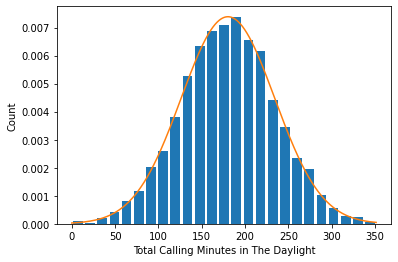

In [12]:
plt.hist(df2.total_day_minutes, bins=25, rwidth=0.8)
plt.xlabel('Total Calling Minutes in The Daylight')
plt.ylabel('Count')
plt.show()
plt.hist(df2.total_day_minutes, bins=25, rwidth=0.8,density=True)
plt.xlabel('Total Calling Minutes in The Daylight')
plt.ylabel('Count')
rng = np.arange(df2.total_day_minutes.min(), df2.total_day_minutes.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.total_day_minutes.mean(),df2.total_day_minutes.std()))
plt.show()

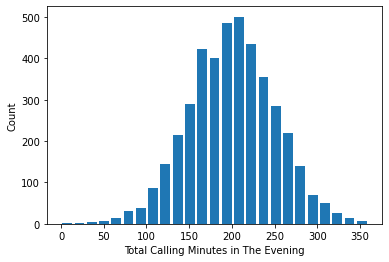

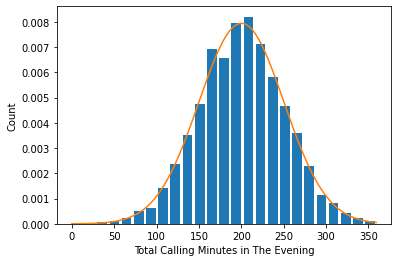

In [13]:
plt.hist(df2.total_eve_minutes, bins=25, rwidth=0.8)
plt.xlabel('Total Calling Minutes in The Evening')
plt.ylabel('Count')
plt.show()
plt.hist(df2.total_eve_minutes, bins=25, rwidth=0.8,density=True)
plt.xlabel('Total Calling Minutes in The Evening')
plt.ylabel('Count')
rng = np.arange(df2.total_eve_minutes.min(), df2.total_eve_minutes.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.total_eve_minutes.mean(),df2.total_eve_minutes.std()))
plt.show()

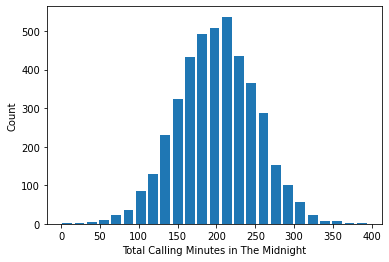

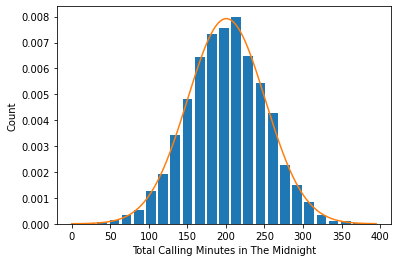

In [14]:
plt.hist(df2.total_night_minutes, bins=25, rwidth=0.8)
plt.xlabel('Total Calling Minutes in The Midnight')
plt.ylabel('Count')
plt.show()
plt.hist(df2.total_night_minutes, bins=25, rwidth=0.8,density=True)
plt.xlabel('Total Calling Minutes in The Midnight')
plt.ylabel('Count')
rng = np.arange(df2.total_night_minutes.min(), df2.total_night_minutes.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.total_night_minutes.mean(),df2.total_night_minutes.std()))
plt.show()

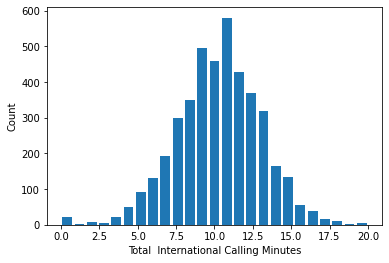

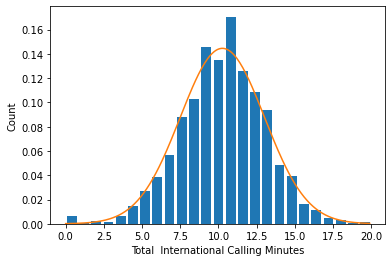

In [15]:
plt.hist(df2.total_intl_minutes, bins=25, rwidth=0.8)
plt.xlabel('Total  International Calling Minutes')
plt.ylabel('Count')
plt.show()
plt.hist(df2.total_intl_minutes, bins=25, rwidth=0.8, density = True)
plt.xlabel('Total  International Calling Minutes')
plt.ylabel('Count')
rng = np.arange(df2.total_intl_minutes.min(), df2.total_intl_minutes.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.total_intl_minutes.mean(),df2.total_intl_minutes.std()))
plt.show()

## Outliers detection using boxplot

In [16]:
outliers_detect = df2.drop(['state','area_code'],axis=1)
# outliers_detect

<AxesSubplot:>

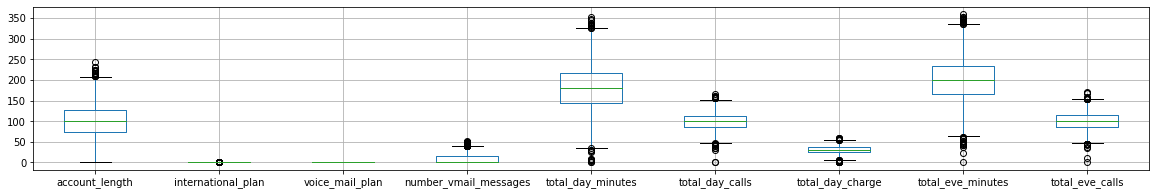

In [17]:
outliers_detect.iloc[:,0:9].boxplot(figsize =(20,3))

<AxesSubplot:>

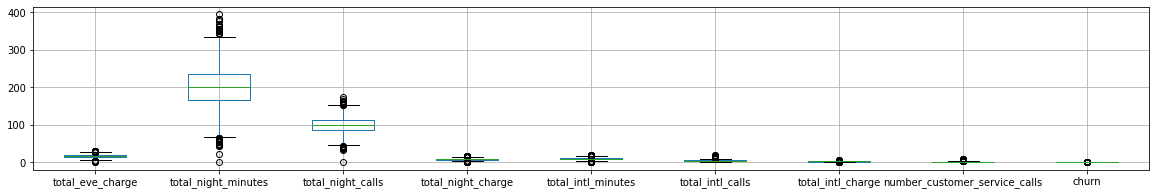

In [18]:
outliers_detect.iloc[:,9:].boxplot(figsize =(20,3))

## Finding correlation of each value in different column using pearson coef

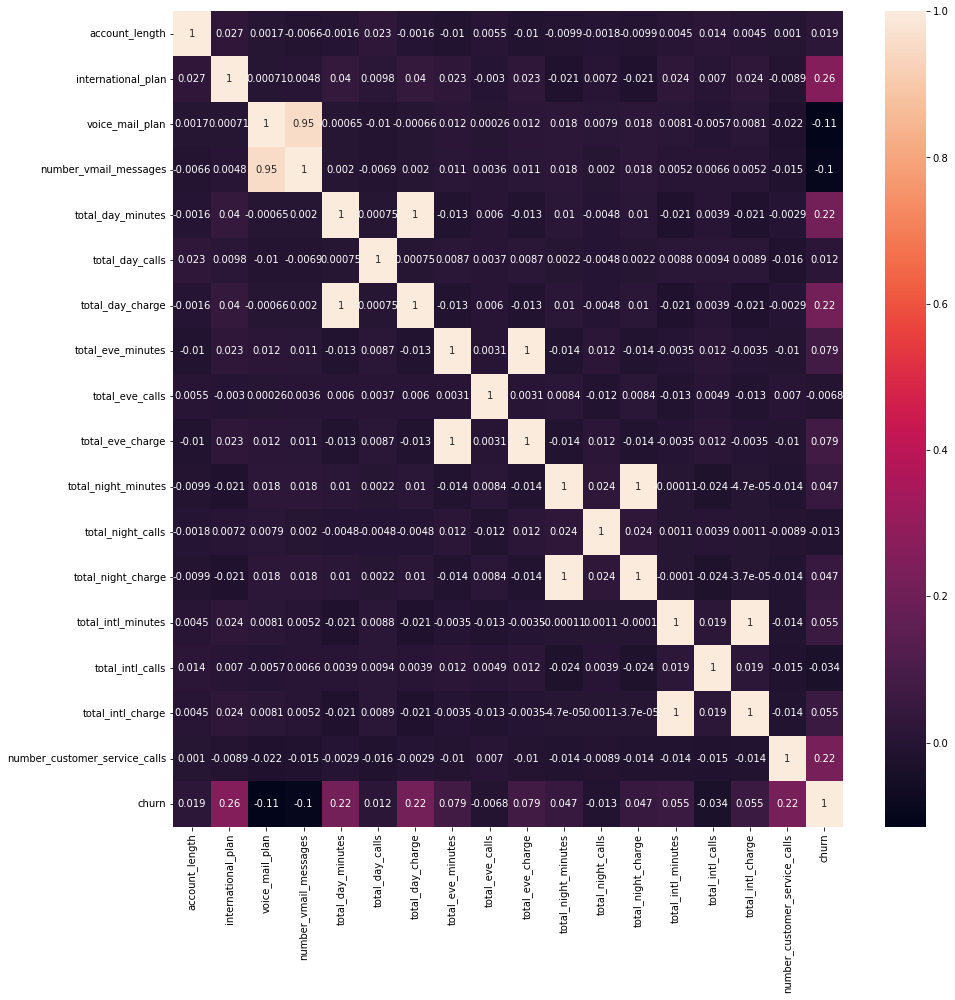

In [19]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(outliers_detect.corr(),annot=True)
plt.show()

## Count customers churn

In [20]:
df2_churn = df2[df2.churn==1]
df2_no_churn = df2[df2.churn==0]

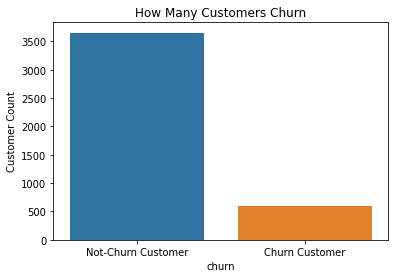

In [21]:
sns.countplot(data=df2, x="churn")
plt.xticks([0,1],['Not-Churn Customer', 'Churn Customer'])
plt.ylabel('Customer Count')
plt.title('How Many Customers Churn')
plt.show()

## Total churn customers per area

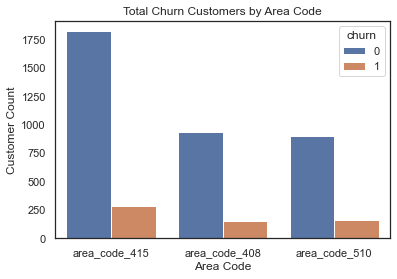

In [22]:
sns.set(style='white')
sns.countplot(data=df2, x="area_code", hue="churn")
plt.title('Total Churn Customers by Area Code')
plt.ylabel('Customer Count')
plt.xlabel('Area Code')
plt.show()

## Graphing minutes call comparison between churn and not-churn customers

In [23]:
avg_df2_churn = df2_churn.mean(numeric_only=True)
dict_churn = avg_df2_churn.to_dict()

In [24]:
avg_df2_no_churn = df2_no_churn.mean(numeric_only=True)
dict_no_churn = avg_df2_no_churn.to_dict()

In [25]:
def average_val(dict_var):
    key = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']
    val = [dict_var[x] for x in key]
#     print(key,val)
    return key,val

In [26]:
x1,y1 = average_val(dict_churn)

In [27]:
x2,y2 = average_val(dict_no_churn)

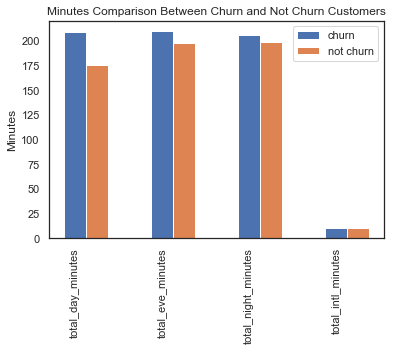

In [28]:
w=0.25
bar1 = np.arange(len(range(1,5)))
bar2 = [i+w for i in bar1]
plt.bar(bar1,y1,w)
plt.bar(bar2,y2,w)
plt.xticks(bar1,x1,rotation = 90)
plt.legend(['churn','not churn'])
plt.ylabel('Minutes')
plt.title('Minutes Comparison Between Churn and Not Churn Customers')
plt.show()

## Define function to remove outliers using IQR

In [29]:
def outlier_removal(dataframe):
    for k in dataframe.keys().tolist():
        try:
#             print(k)
            if k not in ['international_plan','churn']:
#                 print(k)
                Q1 = dataframe[k].quantile(0.25)
                Q3 = dataframe[k].quantile(0.75)
                IQR = Q3 - Q1
                lower_limit = Q1 - 1.5*IQR
                upper_limit = Q3 + 1.5*IQR
                dataframe = dataframe[(dataframe[k]<=upper_limit)&(dataframe[k]>=lower_limit)]
            else:
                continue
        except:
#             print(k)
            continue
    return dataframe

In [30]:
df_without_outliers = outlier_removal(df2)

# Machine Learning

In [31]:
df3 = df_without_outliers.copy()

In [32]:
df3.drop(columns= ['state', 'area_code'], inplace= True)

In [33]:
df3['total_minutes'] =  df3['total_day_minutes'] + df3['total_eve_minutes'] + df3['total_night_minutes']
df3['calls_count'] = df3['total_day_calls'] + df3['total_eve_calls'] + df3['total_night_calls']
df3.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
df3.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], inplace=True)
df3.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)

In [34]:
df3.head(5)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,calls_count
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356
5,147,1,0,0,7.1,6,1.92,0,0,471.9,269
7,141,1,1,37,11.2,5,3.02,0,0,807.0,292


In [35]:
from collections import Counter
Counter(df3.churn).items()

dict_items([(0, 3136), (1, 365)])

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df3[['account_length','total_intl_minutes','total_intl_calls','number_customer_service_calls','total_minutes','calls_count']]
y = df3.churn

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train.shape

(2345, 6)

In [43]:
Counter(y_train).items()

dict_items([(0, 2103), (1, 242)])

In [46]:
ros = RandomOverSampler(sampling_strategy='not majority')
X_res , y_res = ros.fit_resample(X_train,y_train)

In [47]:
Counter(y_res).items()

dict_items([(0, 2103), (1, 2103)])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [52]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,scoring='accuracy')
    clf.fit(X_res, y_res)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.970044,{'n_estimators': 10}
1,logistic_regression,0.699002,{'C': 10}


In [56]:
rf = RandomForestClassifier(n_estimators= 10)
model = rf.fit(X_res,y_res)
model.score(X_test,y_test)

0.8901384083044983

## Test Data

In [57]:
test = pd.read_csv('test.csv')
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [58]:
test['total_minutes'] =  test['total_day_minutes'] + test['total_eve_minutes'] + test['total_night_minutes']
test['calls_count'] = test['total_day_calls'] + test['total_eve_calls'] + test['total_night_calls']
test.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
test.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], inplace=True)
test.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)

In [59]:
X_test = test[['account_length','total_intl_minutes','total_intl_calls','number_customer_service_calls','total_minutes','calls_count']]

In [61]:
test['churn'] = model.predict(X_test)

In [62]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,calls_count,churn
0,1,KS,128,area_code_415,no,yes,25,10.0,3,2.70,1,707.2,300,1
1,2,AL,118,area_code_510,yes,no,0,6.3,6,1.70,0,647.9,317,0
2,3,IA,62,area_code_415,no,no,0,13.1,6,3.54,4,630.9,245,0
3,4,VT,93,area_code_510,no,no,0,8.1,3,2.19,3,538.5,346,0
4,5,NE,174,area_code_415,no,no,0,15.5,5,4.19,3,652.1,303,0


In [63]:
Counter(test.churn).items()

dict_items([(1, 58), (0, 692)])